In [9]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# 1. Load datasets
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [16]:
import pandas as pd

# Load both datasets
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Display first few rows of each dataset
print("Historical Data Columns:\n", historical_df.columns)
print("\nSentiment Data Columns:\n", sentiment_df.columns)

print("\nSample Historical Data:")
print(historical_df.head())

print("\nSample Sentiment Data:")
print(sentiment_df.head())


Historical Data Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment Data Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Sample Historical Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1  

In [17]:
# 2. Convert 'Timestamp IST' in historical data to date
historical_df['date'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date


In [18]:
# 3. Convert 'date' in sentiment data to date type
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [19]:
# 4. Merge on 'date'
merged_df = pd.merge(historical_df, sentiment_df[['date', 'classification']], on='date', how='inner')

In [20]:
# 5. Create new columns
merged_df['win_trade'] = merged_df['Closed PnL'] > 0
merged_df['loss_trade'] = merged_df['Closed PnL'] < 0
merged_df['PnL_per_USD'] = merged_df['Closed PnL'] / merged_df['Size USD'].replace(0, pd.NA)

In [21]:
# 6. Group by classification to calculate summary statistics
grouped_stats = merged_df.groupby('classification').agg(
    average_closed_pnl=('Closed PnL', 'mean'),
    win_rate=('win_trade', 'mean'),
    average_size_usd=('Size USD', 'mean')
).reset_index()

In [22]:
# Print results
print("\nGrouped Summary Statistics:")
print(grouped_stats)



Grouped Summary Statistics:
  classification  average_closed_pnl  win_rate  average_size_usd
0   Extreme Fear           34.537862  0.370607       5349.731843
1  Extreme Greed           67.892861  0.464943       3112.251565
2           Fear           54.290400  0.420768       7816.109931
3          Greed           42.743559  0.384828       5736.884375
4        Neutral           34.307718  0.396991       4782.732661


/tmp/ipython-input-23-1964429719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='Set2')


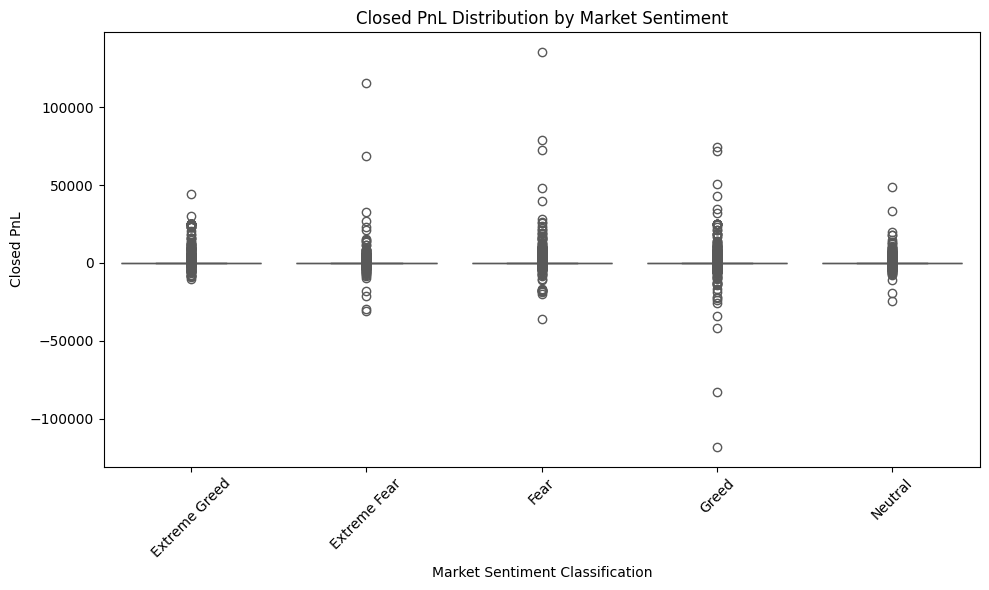

In [23]:
# 7a. Boxplot: Closed PnL by Classification
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='Set2')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-2320051716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='win_rate', data=grouped_stats, palette='Set3')


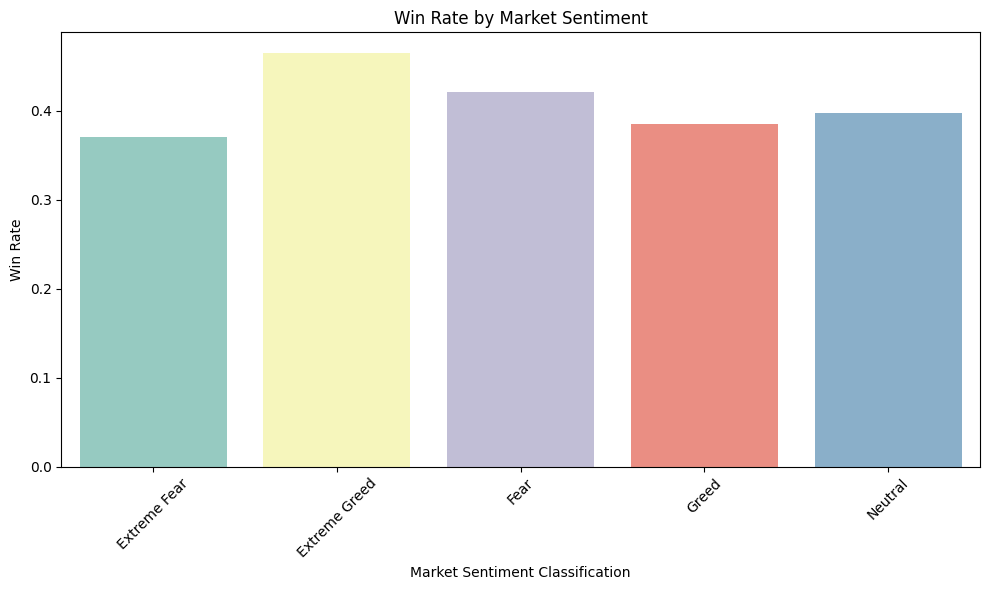

In [24]:
# 7b. Barplot: Win Rate by Classification
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='win_rate', data=grouped_stats, palette='Set3')
plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()